In [3]:
from sklearn.model_selection import train_test_split

In [1]:
import pandas as pd
import numpy as np
   

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_CAN_log.csv')
print(df.head())
print(df.shape)

     RPM  Speed  attack
0  626.0    0.0       0
1    0.0    0.0       0
2  624.0    0.0       0
3    0.0    0.0       0
4  624.0    0.0       0
(20627, 3)


In [4]:
X = df[['RPM', 'Speed']]  
y = df['attack']  

# Splitting the dataset 3/4 for training and 1/4 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73      2212
           1       0.76      1.00      0.86      2945

    accuracy                           0.82      5157
   macro avg       0.88      0.79      0.80      5157
weighted avg       0.86      0.82      0.81      5157



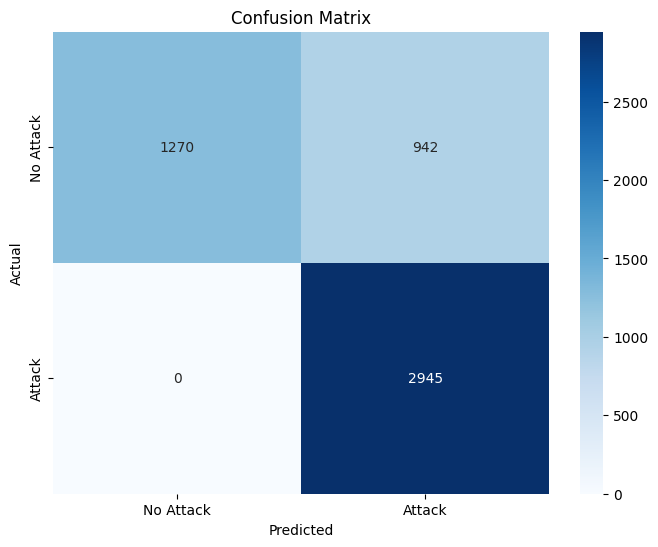

In [6]:
# Initializing the SupportVectorMachine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions 
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()